In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import text
import numpy as np

In [2]:
from astropy.coordinates import SkyCoord
from hips import WCSGeometry
from hips import make_sky_image, HipsPainter

geometry = WCSGeometry.create(
     skydir=SkyCoord(0, 0, unit='deg', frame='galactic'),
     width=2000, height=1000, fov="3 deg",
     coordsys='galactic', projection='AIT',
)


In [2]:
hips_survey = 'CDS/P/DSS2/red'

In [4]:
precise_painter = HipsPainter(geometry, hips_survey, tile_format='fits', precise=True)


In [5]:
precise_painter.run()

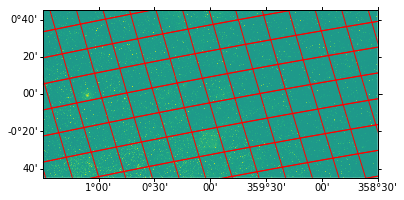

In [6]:
precise_painter.plot_mpl_hips_tile_grid()

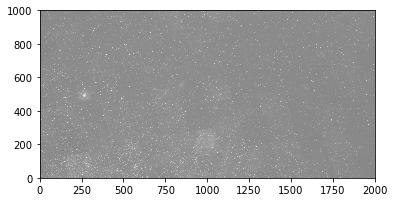

In [7]:
plt.imshow(precise_painter.image, cmap='gray', origin='lower',)


In [10]:
simple_painter = HipsPainter(geometry, hips_survey, tile_format='fits', precise=False)
simple_painter.run()


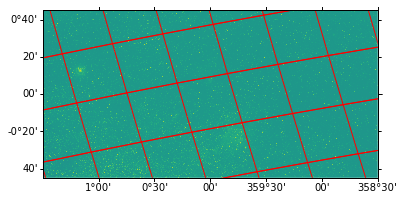

In [11]:
simple_painter.plot_mpl_hips_tile_grid()

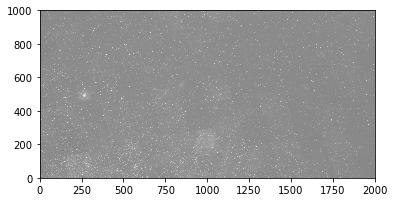

In [12]:
plt.imshow(precise_painter.image, cmap='gray', origin='lower',)


### Using the same example as: http://cds.unistra.fr/~boch/AL/test-reduce-deformations2.html

In [3]:
# geometry = WCSGeometry.create(
#      skydir=SkyCoord(0, 0, unit='deg', frame='galactic'),
#      width=2000, height=1000, fov="13 deg",
#      coordsys='icrs', projection='AIT',
# )
# SkyCoord(0, 0, unit='deg', frame='galactic')
sky = SkyCoord(123.5769, -02.1484, frame='galactic', unit='deg')
geometry = WCSGeometry.create(
     skydir=sky,
     width=2000, height=1000, fov="16.98 deg",
     coordsys='galactic', projection='AIT',
)



In [4]:
hips_survey = 'CDS/P/DSS2/color'
precise_painter = HipsPainter(geometry, hips_survey, tile_format='jpg', precise=True, progress_bar=True)

In [5]:
precise_painter.tiles

Fetching tiles: 100%|██████████| 23/23 [00:20<00:00,  1.14it/s]


In [6]:
precise_painter.run()

Drawing tiles: 100%|██████████| 92/92 [00:34<00:00,  2.87it/s]


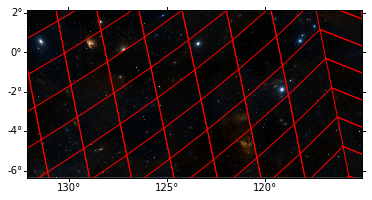

In [9]:
text(800, 800,'matplotlib', fontsize=120, horizontalalignment='center', verticalalignment='center')
precise_painter.plot_mpl_hips_tile_grid()

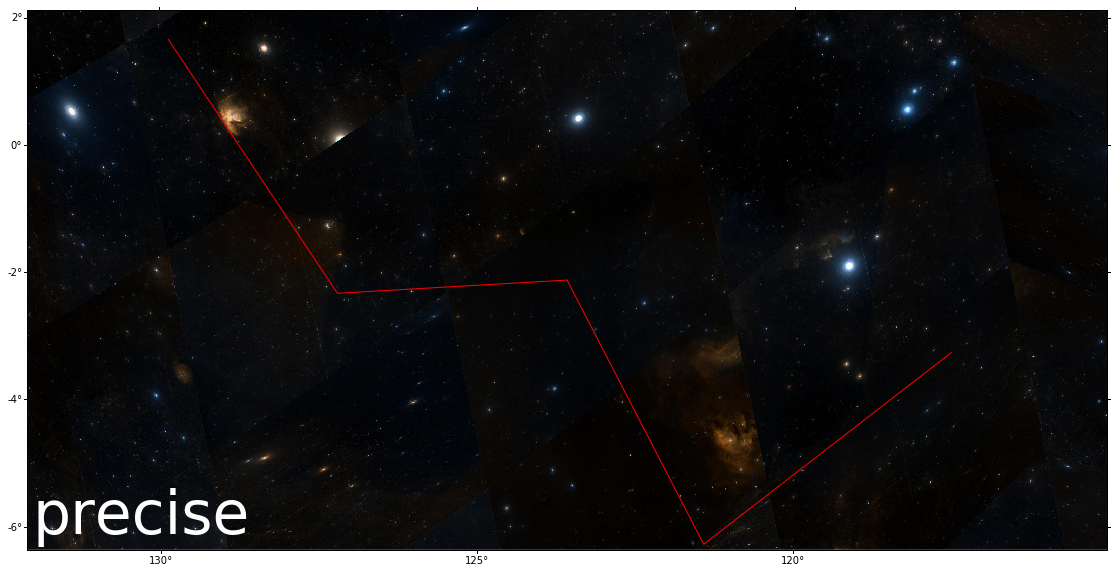

In [10]:
from astropy.visualization.wcsaxes import WCSAxes

fig = plt.figure(figsize=(15, 15))
ax = WCSAxes(fig, [1, 1, 1, 1], wcs=geometry.wcs)
fig.add_axes(ax)
text(10, 30,'precise', fontsize=60, color='white')
# Coordinates copies from: view-source:http://cds.unistra.fr/~boch/AL/test-reduce-deformations2.html
x_coords = [2.29452158, 10.12683778, 14.1772154, 21.45396446, 28.59885697]
y_coords = [59.14978110, 56.53733116, 60.7167403, 60.23528403, 63.67010079]
ax.plot(x_coords, y_coords, 'r', lw=1, transform=ax.get_transform('icrs'))
ax.imshow(precise_painter.image, cmap='gray', origin='lower',)

# Points found manually
# plt.plot([70, 815, 1300, 1670], [477, 530, 175, 510], lw=1, color='red')

In [11]:
simple_painter = HipsPainter(geometry, hips_survey, tile_format='jpg', precise=False)
simple_painter.run()

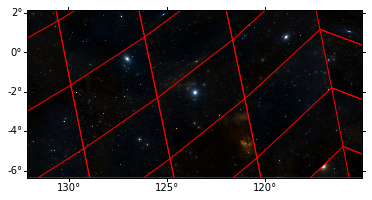

In [12]:
simple_painter.plot_mpl_hips_tile_grid()

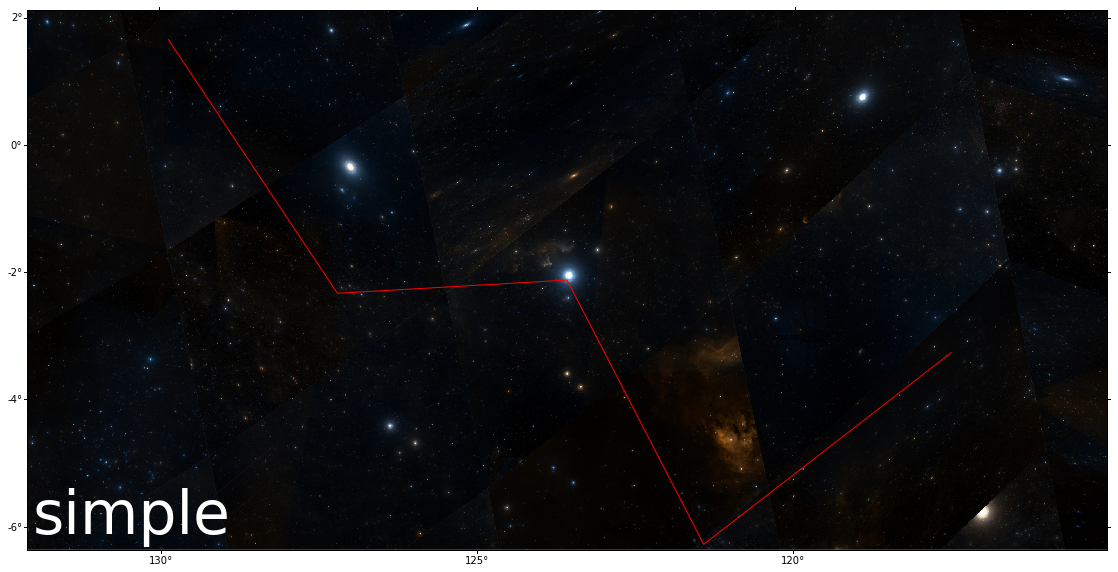

In [13]:
from astropy.visualization.wcsaxes import WCSAxes

fig = plt.figure(figsize=(15, 15))
ax = WCSAxes(fig, [1, 1, 1, 1], wcs=geometry.wcs)
fig.add_axes(ax)

text(10, 30,'simple', fontsize=60, color='white')

x_coords = [2.29452158, 10.12683778, 14.1772154, 21.45396446, 28.59885697]
y_coords = [59.14978110, 56.53733116, 60.7167403, 60.23528403, 63.67010079]
ax.plot(x_coords, y_coords, 'r', lw=1, transform=ax.get_transform('icrs'))
plt.imshow(simple_painter.image, cmap='gray', origin='lower',)


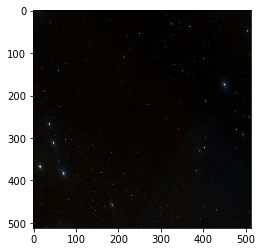

In [14]:
plt.imshow(simple_painter.draw_tiles[19].data)

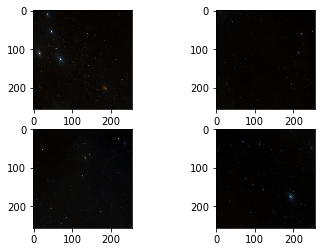

In [15]:
f, axarr = plt.subplots(2,2)
children = simple_painter.draw_tiles[19].children
axarr[0,0].imshow(children[0].data)
axarr[0,1].imshow(children[1].data)
axarr[1,0].imshow(children[2].data)
axarr[1,1].imshow(children[3].data)


In [16]:
# simple_painter._tiles = simple_painter.draw_tiles[19]
# simple_painter.draw_tiles()
# simple_painter.plot_mpl_hips_tile_grid()